<div class="head0">
    <div class="head0__name">
        Examples for grid module
    </div>
    <div class="head0__note">
        Construction and representation of uniform or Chebyshev multidimensional grid.
    </div>
</div>

In [1]:
import numpy as np

from fpcross import ij, Grid

ij()

Start | 12:42PM MSK on Oct 11, 2019 | python 3.7.1    |
-------------------------------------------------------


<div class="head1">
    <div class="head1__name">
        Init grid
    </div>
    <div class="head1__note">
        We can init grid using various types for it parameters.
    </div>
</div>

In [2]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimensions       : 2 
Mean             : Poi 6   | Min -2.500 | Max 2.500  |
Dim. # 1         : Poi 5   | Min -4.000 | Max 3.000  |
Dim. # 2         : Poi 7   | Min -1.000 | Max 2.000  |


In [3]:
GR = Grid(n=5, l=[[-4., 3.], [-1., 2.]])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimensions       : 2 
Mean             : Poi 5   | Min -2.500 | Max 2.500  |
Dim. # 1         : Poi 5   | Min -4.000 | Max 3.000  |
Dim. # 2         : Poi 5   | Min -1.000 | Max 2.000  |


In [4]:
GR = Grid(d=2, n=5, l=[-4., 3.])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimensions       : 2 
                 : Poi 5   | Min -4.000 | Max 3.000  |


In [5]:
GR = Grid(d=20, n=np.arange(20)+10, l=[-4., 3.])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimensions       : 20
Mean             : Poi 19  | Min -4.000 | Max 3.000  |
Dim. # 1         : Poi 10  | Min -4.000 | Max 3.000  |
Dim. # 2         : Poi 11  | Min -4.000 | Max 3.000  |
Dim. # 3         : Poi 12  | Min -4.000 | Max 3.000  |
Dim. # 4         : Poi 13  | Min -4.000 | Max 3.000  |
Dim. # 5         : Poi 14  | Min -4.000 | Max 3.000  |
 ...             : ...
Dim. # 16        : Poi 25  | Min -4.000 | Max 3.000  |
Dim. # 17        : Poi 26  | Min -4.000 | Max 3.000  |
Dim. # 18        : Poi 27  | Min -4.000 | Max 3.000  |
Dim. # 19        : Poi 28  | Min -4.000 | Max 3.000  |
Dim. # 20        : Poi 29  | Min -4.000 | Max 3.000  |


<div class="head1">
    <div class="head1__name">
        Index transformation
    </div>
    <div class="head1__note">
        We can transform multi index to the flatten index and back.
    </div>
</div>

In [6]:
GR = Grid(n=[5, 7, 8])

print('0         -> ', GR.indm(0))
print('1         -> ', GR.indm(1))
print('5         -> ', GR.indm(5))
print('279       -> ', GR.indm(279))

print('[0, 0, 0] -> ', GR.indf([0, 0, 0]))
print('[1, 0, 0] -> ', GR.indf([1, 0, 0]))
print('[0, 1, 0] -> ', GR.indf([0, 1, 0]))
print('[4, 6, 7] -> ', GR.indf([4, 6, 7]))

0         ->  (0, 0, 0)
1         ->  (1, 0, 0)
5         ->  (0, 1, 0)
279       ->  (4, 6, 7)
[0, 0, 0] ->  0
[1, 0, 0] ->  1
[0, 1, 0] ->  5
[4, 6, 7] ->  279


<div class="head1">
    <div class="head1__name">
        Compute grid points
    </div>
    <div class="head1__note">
        We can find some or all grid points.
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Some points of uniform grid
    </div>
</div>

In [7]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='u')
X = GR.comp([0, 0])
print(X.shape, X.reshape(-1))
X = GR.comp([4, 6])
print(X.shape, X.reshape(-1))
X = GR.comp([
    [0, 4],
    [0, 6],
])
print(X)

(2, 1) [-4. -1.]
(2, 1) [3. 2.]
[[-4.  3.]
 [-1.  2.]]


In [8]:
I = np.array([
    [0, 4],
    [0, 6],
])
n = np.repeat(GR.n.reshape((-1, 1)), I.shape[1], axis=1)
t = I * 1. / (n - 1)
l1 = np.repeat(GR.l[:, 0].reshape((-1, 1)), I.shape[1], axis=1)
l2 = np.repeat(GR.l[:, 1].reshape((-1, 1)), I.shape[1], axis=1)
X = t * (l2 - l1) + l1
X

array([[-4.,  3.],
       [-1.,  2.]])

<div class="head2">
    <div class="head2__name">
        Some points of Chebyshev grid
    </div>
</div>

In [9]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
X = GR.comp([0, 0])
print(X.shape, X.reshape(-1))
X = GR.comp([4, 6])
print(X.shape, X.reshape(-1))
X = GR.comp([
    [0, 4],
    [0, 6],
])
print(X)

(2, 1) [3. 2.]
(2, 1) [-4. -1.]
[[ 3. -4.]
 [ 2. -1.]]


<div class="head2">
    <div class="head2__name">
        Full grid
    </div>
</div>

In [10]:
GR = Grid(n=[3, 4], l=[[-4., 3.], [-1., 2.]])
X = GR.comp()
print(X)

[[ 3.   -0.5  -4.    3.   -0.5  -4.    3.   -0.5  -4.    3.   -0.5  -4.  ]
 [ 2.    2.    2.    1.25  1.25  1.25 -0.25 -0.25 -0.25 -1.   -1.   -1.  ]]


<div class="head1">
    <div class="head1__name">
        Plot grid
    </div>
    <div class="head1__note">
        We can plot 2-dimensional grid (full or some its points).
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Some points of uniform grid
    </div>
</div>

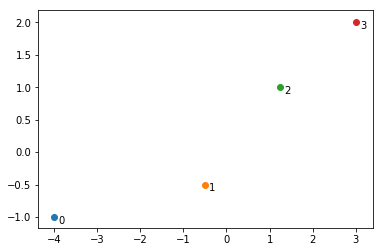

In [11]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='u')
GR.plot(I=[
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])

<div class="head2">
    <div class="head2__name">
        Full uniform grid
    </div>
</div>

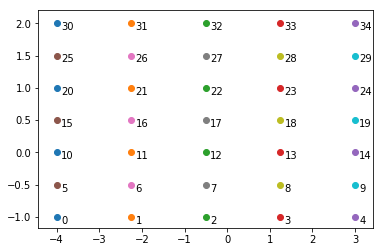

In [12]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='u')
GR.plot()

<div class="head2">
    <div class="head2__name">
        Some points of Chebyshev grid
    </div>
</div>

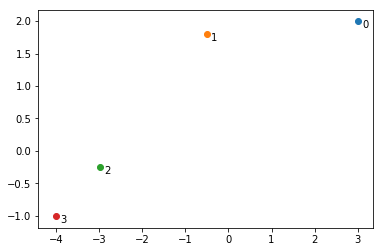

In [13]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
GR.plot(I=[
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])

<div class="head2">
    <div class="head2__name">
        Full Chebyshev grid
    </div>
</div>

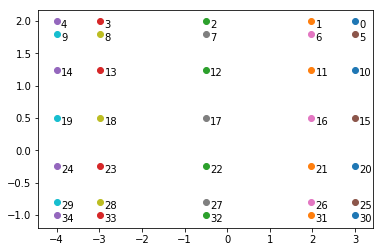

In [14]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
GR.plot()

<div class="head2">
    <div class="head2__name">
        Random points
    </div>
</div>

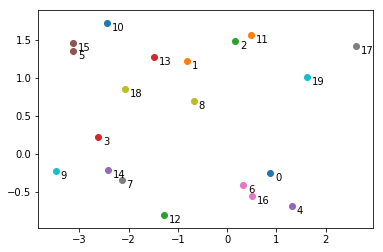

In [15]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
GR.plot(n=20)

<div class="head1">
    <div class="head1__name">
        Find grid point
    </div>
    <div class="head1__note">
        We can find index of the nearest grid point.
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Uniform grid
    </div>
</div>

     Grid index :  27


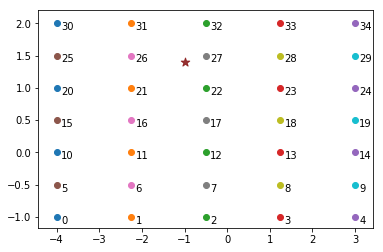

In [16]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='u')
x = [-1., 1.4]
i = GR.find(x)

print('     Grid index : ', i)
GR.plot(x0=x)

<div class="head2">
    <div class="head2__name">
        Chebyshev grid
    </div>
</div>

     Grid index :  13


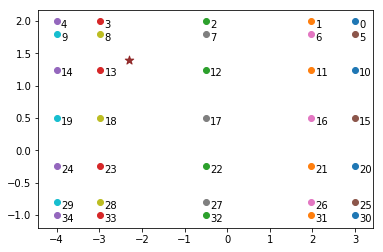

In [17]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
x = [-2.3, 1.4]
i = GR.find(x)

print('     Grid index : ', i)
GR.plot(x0=x)

<div class="head1">
    <div class="head1__name">
        Check if point inside the grid
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Uniform grid
    </div>
</div>

     Point is :  inside


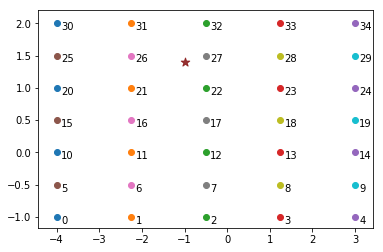

     Point is :  outside


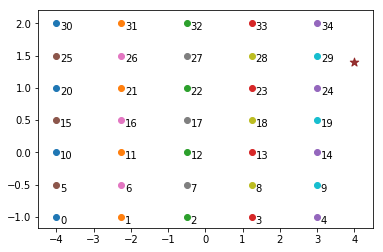

In [18]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='u')

x = [-1., 1.4]
r = GR.is_out(x)

print('     Point is : ', 'outside' if r else 'inside')
GR.plot(x0=x)

x = [4., 1.4]
r = GR.is_out(x)

print('     Point is : ', 'outside' if r else 'inside')
GR.plot(x0=x)

<div class="head2">
    <div class="head2__name">
        Chebyshev grid
    </div>
</div>

     Point is :  inside


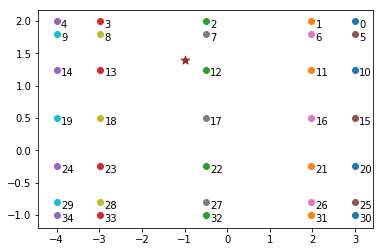

     Point is :  outside


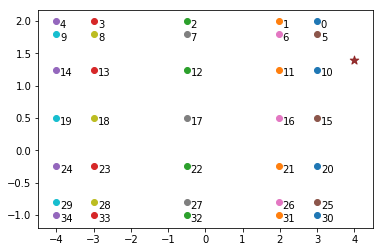

In [19]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
x = [-2.3, 1.4]
i = GR.find(x)

x = [-1., 1.4]
r = GR.is_out(x)

print('     Point is : ', 'outside' if r else 'inside')
GR.plot(x0=x)

x = [4., 1.4]
r = GR.is_out(x)

print('     Point is : ', 'outside' if r else 'inside')
GR.plot(x0=x)

<div class="head1">
    <div class="head1__name">
        Construct sub grid
    </div>
</div>

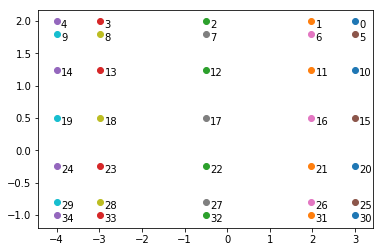

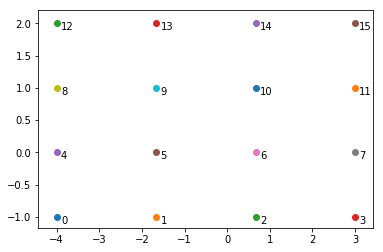

In [2]:
GR1 = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
GR1.plot()

N = 23

GR2 = GR1.copy(n=int(N**(1./GR1.d)), kind='u')
GR2.plot()

<div class="end"></div>

In [17]:
### TMP.
i = [22.4, 33.2, 38.9]
i = np.rint(i).astype(int)
i

array([22, 33, 39])